# Machine Learning Engineer Nanodegree Capstone Project

# Importing Dependencies

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading the Dataset

In [5]:
df = pd.read_csv('bank_full.csv', sep= ';')
df.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]

In [6]:
df.shape

(45211, 17)

In [7]:
df.describe().T

count         mean          std  ...    50%     75%       max
age       45211.0    40.936210    10.618762  ...   39.0    48.0      95.0
balance   45211.0  1362.272058  3044.765829  ...  448.0  1428.0  102127.0
day       45211.0    15.806419     8.322476  ...   16.0    21.0      31.0
duration  45211.0   258.163080   257.527812  ...  180.0   319.0    4918.0
campaign  45211.0     2.763841     3.098021  ...    2.0     3.0      63.0
pdays     45211.0    40.197828   100.128746  ...   -1.0    -1.0     871.0
previous  45211.0     0.580323     2.303441  ...    0.0     0.0     275.0

[7 rows x 8 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df.describe(include='all')

age          job  marital  ...      previous poutcome      y
count   45211.000000        45211    45211  ...  45211.000000    45211  45211
unique           NaN           12        3  ...           NaN        4      2
top              NaN  blue-collar  married  ...           NaN  unknown     no
freq             NaN         9732    27214  ...           NaN    36959  39922
mean       40.936210          NaN      NaN  ...      0.580323      NaN    NaN
std        10.618762          NaN      NaN  ...      2.303441      NaN    NaN
min        18.000000          NaN      NaN  ...      0.000000      NaN    NaN
25%        33.000000          NaN      NaN  ...      0.000000      NaN    NaN
50%        39.000000          NaN      NaN  ...      0.000000      NaN    NaN
75%        48.000000          NaN      NaN  ...      0.000000      NaN    NaN
max        95.000000          NaN      NaN  ...    275.000000      NaN    NaN

[11 rows x 17 columns]

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:
df['marital'].sample(n=5) #n=10

5663       single
4729      married
37825      single
34391    divorced
3663      married
Name: marital, dtype: object

In [22]:
cat_val = ["job", "marital", "education", "default","housing", "loan", "contact", "month", "poutcome"]

for col in cat_val:
    print ([col]," :","\n", df[col].value_counts())
    print()

['job']  : 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

['marital']  : 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

['education']  : 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

['default']  : 
 no     44396
yes      815
Name: default, dtype: int64

['housing']  : 
 yes    25130
no     20081
Name: housing, dtype: int64

['loan']  : 
 no     37967
yes     7244
Name: loan, dtype: int64

['contact']  : 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

['month']  : 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
d

In [23]:
df['marital'].sample(frac=0.1, random_state=1) #frac=0.1 means 10%

3610     married
11677    married
33018    married
44323    married
8119      single
          ...   
344      married
42963    married
32860    married
43797    married
35017    married
Name: marital, Length: 4521, dtype: object

**AS OUR DATASET HAS NO NULL VALUES, WE RANDOMLY REMOVE SOME VALUE FROM RANDOM COLUMN TO PERFORM DATA PREPROCESSING.**

In [24]:
col_num=[3,4,5]
column=['marital', 'education', 'loan']
deleted_list=[]
col_name=[]
num=0
while True:
    col=np.random.randint(low=3,high=8)
    #print(col)
    for i in range(len(col_num)):
        if col_num[i]==col:
            col_name=column[i]
    #print(col,col_name)
    row=np.random.randint(low=1,high=42111)
    deleted=str(row)+'x'+str(col)
    if deleted in deleted_list:
        continue
    else:
        #df.iloc[row][col]=np.nan
        df[col_name][row]=np.nan
        deleted_list.append(deleted)
    print(deleted_list)
    num=num+1
    if num==14000:
        break


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['13173x6']
['13173x6', '6749x4']
['13173x6', '6749x4', '25689x3']
['13173x6', '6749x4', '25689x3', '32323x7']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4', '15887x5']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4', '15887x5', '2109x4']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4', '15887x5', '2109x4', '3946x5']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4', '15887x5', '2109x4', '3946x5', '793x7']
['13173x6', '6749x4', '25689x3', '32323x7', '9669x4', '41036x5', '37165x5', '33969x4', '15887x5', '2109x4', '3946x5', '793x7', '12285x4']
['13173x6', '6749x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
df.isnull().sum()

age             0
job             0
marital      4571
education    4405
default         0
balance         0
housing         0
loan         4582
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [26]:
df.marital.mode()

0    married
dtype: object

In [0]:
df.marital = df.marital.fillna('married')

In [28]:
df.education.mode()

0    secondary
dtype: object

In [0]:
df.education=df.education.fillna('secondary')

In [30]:
df.loan.mode()

0    no
dtype: object

In [0]:
df.loan=df.loan.fillna('no')

In [32]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.groupby('y').mean().T

y                  no          yes
age         40.838986    41.670070
balance   1303.714969  1804.267915
day         15.892290    15.158253
duration   221.182806   537.294574
campaign     2.846350     2.141047
pdays       36.421372    68.702968
previous     0.502154     1.170354

In [9]:
df.groupby('job').mean().T

job            admin.  blue-collar  ...   unemployed      unknown
age         39.289886    40.044081  ...    40.961627    47.593750
balance   1135.838909  1078.826654  ...  1521.745971  1772.357639
day         15.564301    15.442561  ...    15.498081    14.642361
duration   246.896732   262.901562  ...   288.543361   237.611111
campaign     2.575324     2.816995  ...     2.432080     3.309028
pdays       47.859021    44.033498  ...    34.146585    20.982639
previous     0.671630     0.505138  ...     0.466616     0.319444

[7 rows x 12 columns]

In [10]:
df.groupby('marital').mean().T

marital      divorced      married       single
age         45.782984    43.408099    33.703440
balance   1178.872287  1425.925590  1301.497654
day         15.796428    15.854487    15.708210
duration   262.517188   253.412765   266.497967
campaign     2.630882     2.842875     2.649805
pdays       41.001728    37.950467    44.652385
previous     0.551373     0.556552     0.642690

In [11]:
df.groupby('education').mean().T

education      primary    secondary     tertiary      unknown
age          45.865567    39.964270    39.593640    44.510501
balance    1250.949934  1154.880786  1758.416435  1526.754443
day          15.421398    15.759159    16.086535    15.810985
duration    255.933002   258.685760   258.518532   257.313947
campaign      2.834331     2.700802     2.825577     2.849219
pdays        36.081740    42.353504    39.024134    36.856220
previous      0.489272     0.567753     0.661980     0.488422

# Exploratory Visualization

Ratio of classes (no : yes) 0.8830151954170445 : 0.11698480458295547


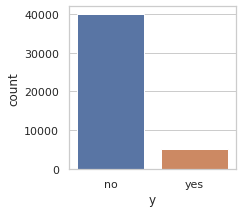

In [0]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

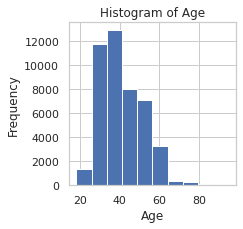

In [12]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

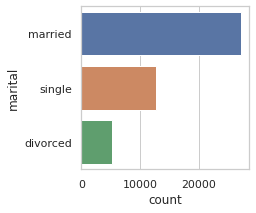

In [13]:
sns.countplot(y = df.marital, data = df)
plt.show()

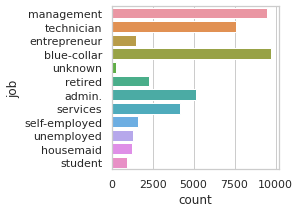

In [14]:
sns.countplot(y = df.job, data = df)
plt.show()

# Looking for interesting facts

In [34]:
print('Min age: ', df['age'].max())
print('Max age: ', df['age'].min())
print('Null Values: ', df['age'].isnull().any())
print('Mean age: ', df['age'].mean())

Min age:  95
Max age:  18
Null Values:  False
Mean age:  40.93621021432837


In [0]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Ratio of classes (no : yes) 0.8830151954170445 : 0.11698480458295547


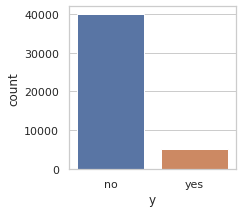

In [36]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

In [38]:
# lets get some more understanding of data and relationships
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan  y  
no    no     33879
      yes     4840
yes   no      6043
      yes      449
dtype: int64


check 2:  job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64


check 3:  marital   y  
divorced  no      4102
          yes      566
married   no     26083
          yes     2951
single    no      9737
          yes     1772
dtype: int64


check 4:  education 

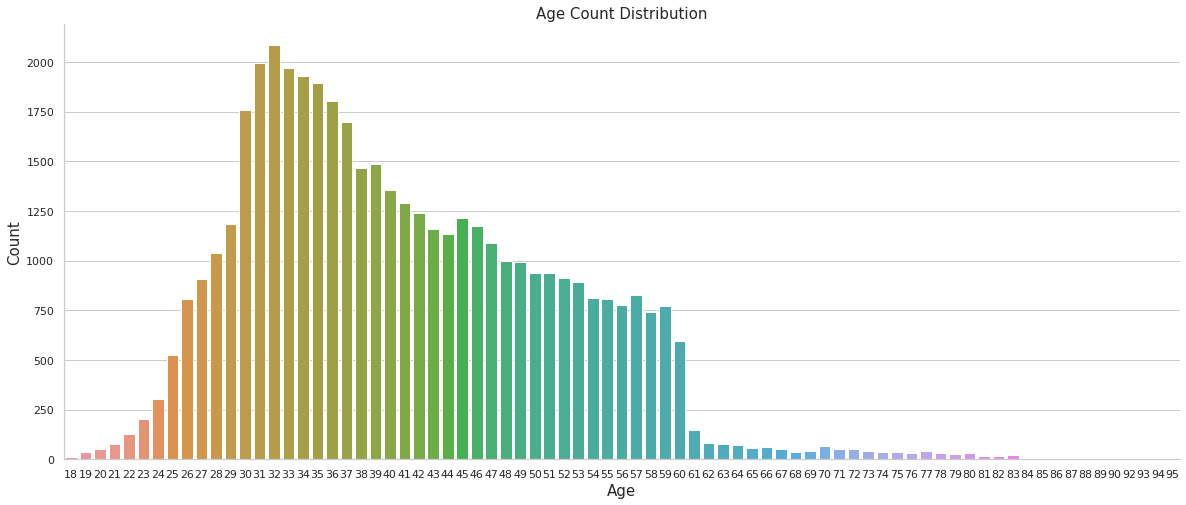

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df.iloc[: , 0:7])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

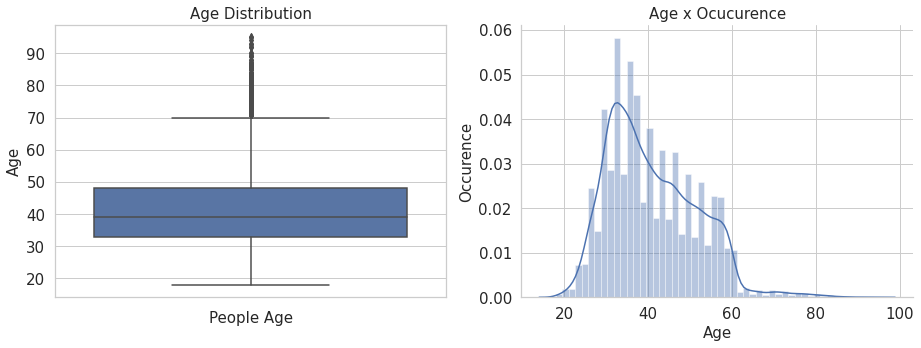

In [40]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

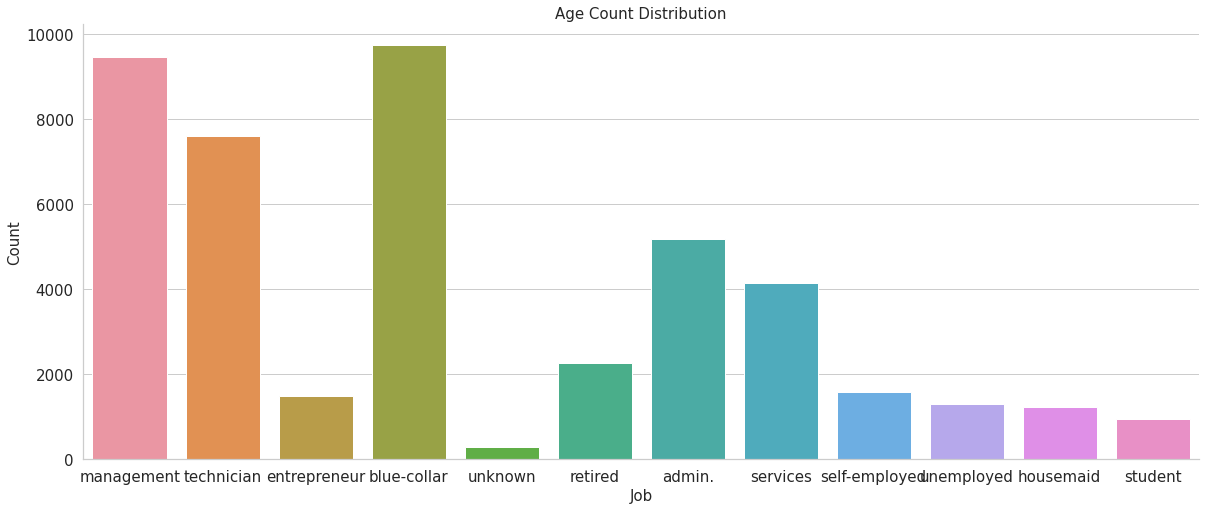

In [41]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

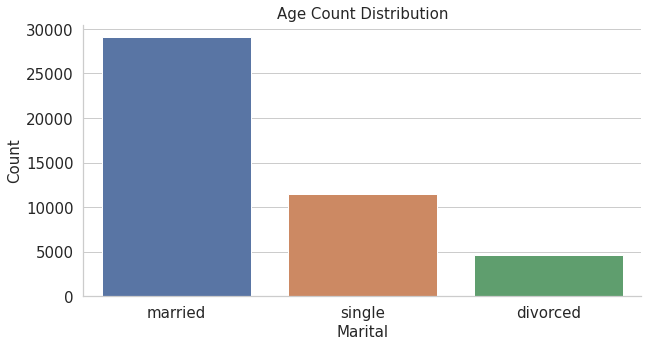

In [42]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x ='marital', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

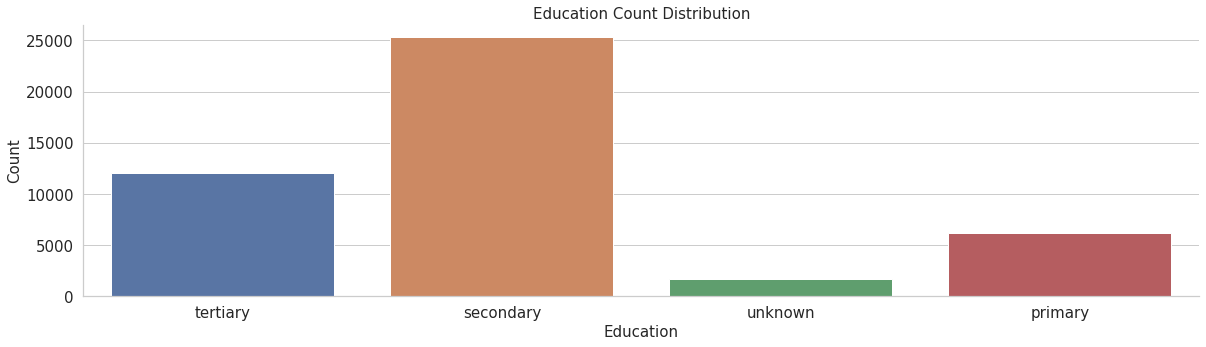

In [43]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x ='education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

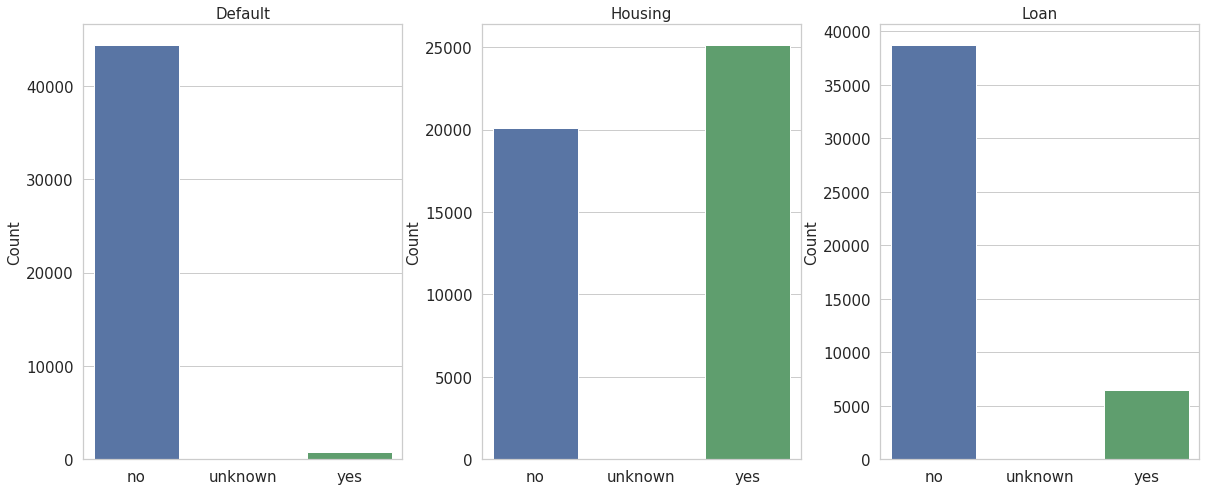

In [44]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

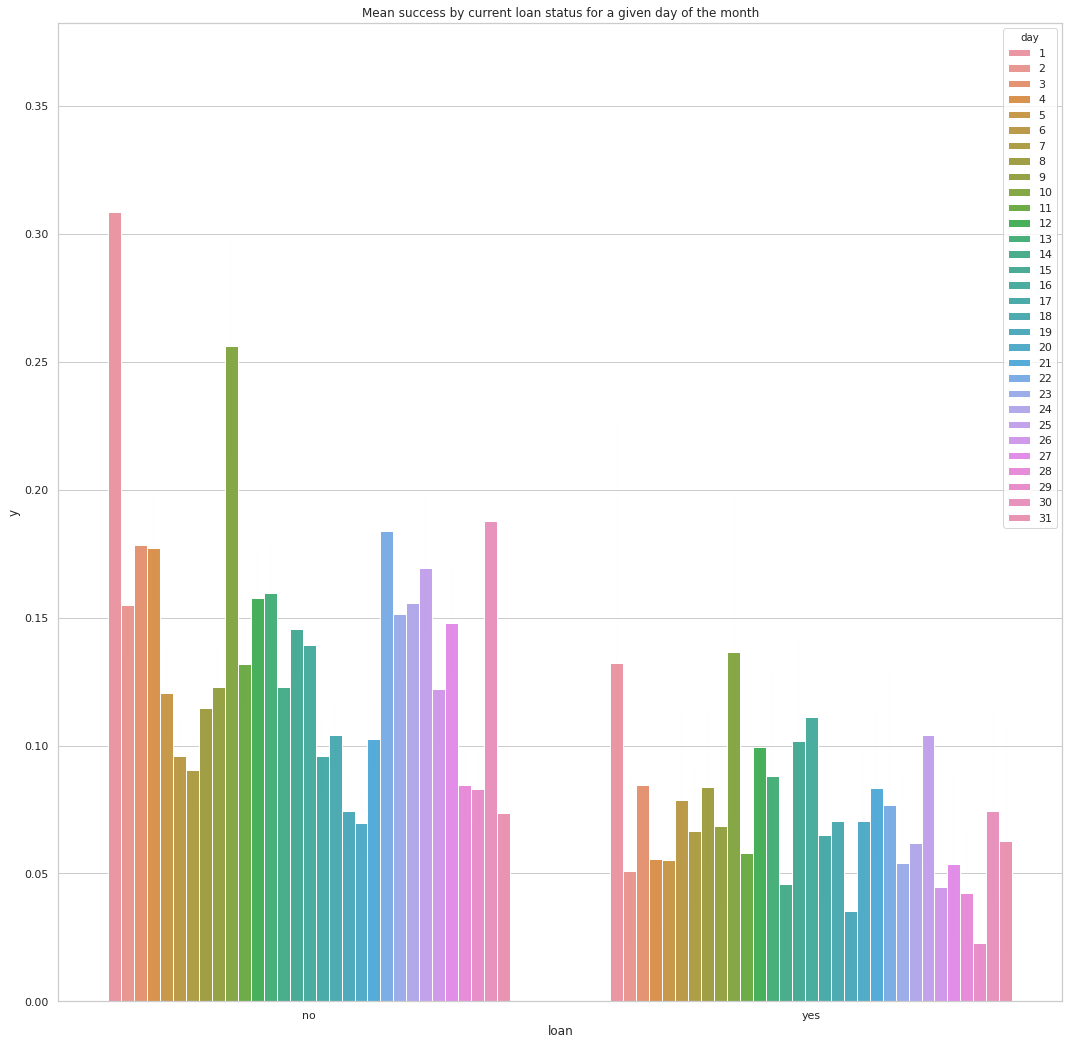

In [45]:
#Label Encoding the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the month')
plt.show()

# Feature Engineering

# Creating some categorical Attributes

In [0]:
df['bal_sign'] = pd.Series(df['balance'] > 0)

# Label Encoding the Binary Attributes

In [0]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [0]:

cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [0]:
df_corr = df.corr()

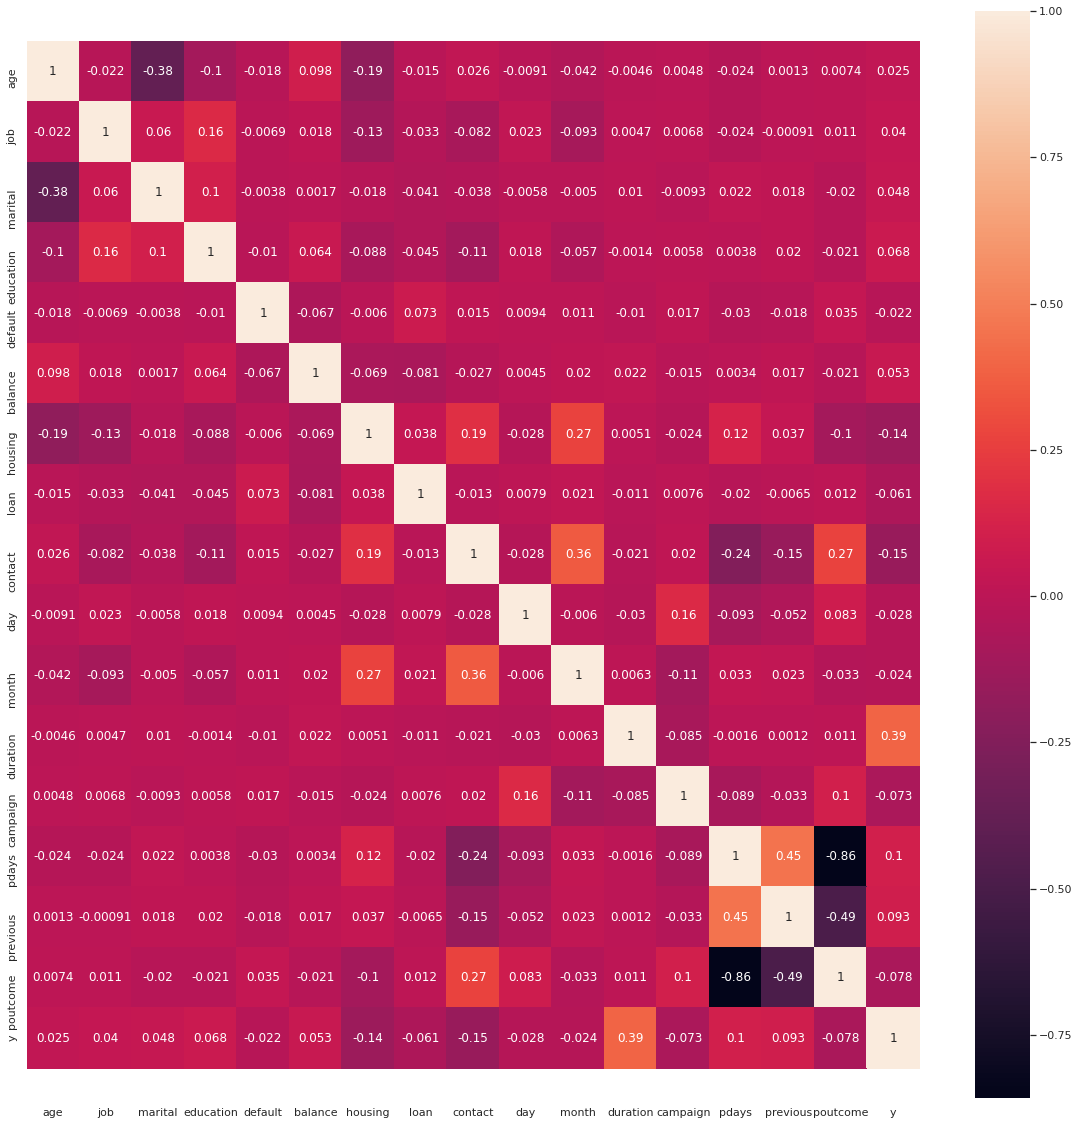

In [50]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df_corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- From the above plot we can observe that most of the features are independent of each other.
- Feature-pair (pdays - previous) is highly negatively correlated.
- Therefore we can remove "pdays"

In [0]:
final_df = df.drop(["pdays"], axis = 1)

In [0]:
df_corr = final_df.corr()

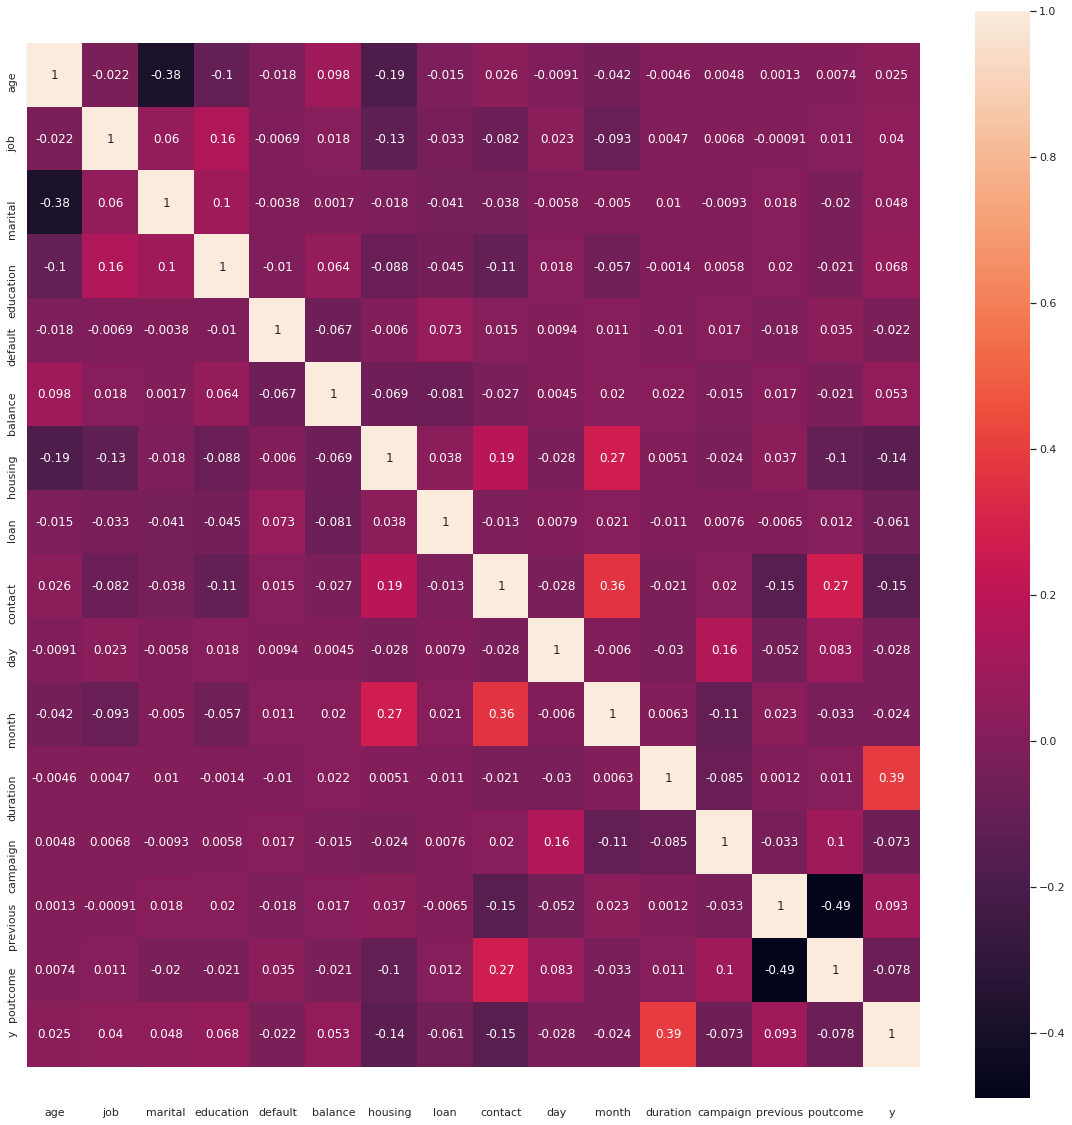

In [53]:
plt.figure(figsize=(20, 20))
ax=sns.heatmap(df_corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [0]:
# ONE HOT ENCODING : 
df = pd.get_dummies(df, columns = cols)

In [55]:
df.head()

age  default  balance  housing  loan  ...  day_26  day_27  day_28  day_29  day_30
0   58        0     2143        1     0  ...       0       0       0       0       0
1   44        0       29        1     0  ...       0       0       0       0       0
2   33        0        2        1     1  ...       0       0       0       0       0
3   47        0     1506        1     0  ...       0       0       0       0       0
4   33        0        1        0     0  ...       0       0       0       0       0

[5 rows x 79 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          45211 non-null  int64
 1   default      45211 non-null  int64
 2   balance      45211 non-null  int64
 3   housing      45211 non-null  int64
 4   loan         45211 non-null  int64
 5   duration     45211 non-null  int64
 6   campaign     45211 non-null  int64
 7   pdays        45211 non-null  int64
 8   previous     45211 non-null  int64
 9   y            45211 non-null  int64
 10  job_0        45211 non-null  uint8
 11  job_1        45211 non-null  uint8
 12  job_2        45211 non-null  uint8
 13  job_3        45211 non-null  uint8
 14  job_4        45211 non-null  uint8
 15  job_5        45211 non-null  uint8
 16  job_6        45211 non-null  uint8
 17  job_7        45211 non-null  uint8
 18  job_8        45211 non-null  uint8
 19  job_9        45211 non-null  uint8
 20  job_10

In [57]:
df.describe().T

count         mean          std  ...    50%     75%       max
age      45211.0    40.936210    10.618762  ...   39.0    48.0      95.0
default  45211.0     0.018027     0.133049  ...    0.0     0.0       1.0
balance  45211.0  1362.272058  3044.765829  ...  448.0  1428.0  102127.0
housing  45211.0     0.555838     0.496878  ...    1.0     1.0       1.0
loan     45211.0     0.143593     0.350681  ...    0.0     0.0       1.0
...          ...          ...          ...  ...    ...     ...       ...
day_26   45211.0     0.024795     0.155501  ...    0.0     0.0       1.0
day_27   45211.0     0.040477     0.197077  ...    0.0     0.0       1.0
day_28   45211.0     0.038597     0.192634  ...    0.0     0.0       1.0
day_29   45211.0     0.034638     0.182862  ...    0.0     0.0       1.0
day_30   45211.0     0.014222     0.118407  ...    0.0     0.0       1.0

[79 rows x 8 columns]

In [0]:
#Label Encoding the class attribute
from sklearn.preprocessing import MinMaxScaler
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [0]:
fraud=df[df['y']=="yes"]

In [60]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          0 non-null      int64
 1   default      0 non-null      int64
 2   balance      0 non-null      int64
 3   housing      0 non-null      int64
 4   loan         0 non-null      int64
 5   duration     0 non-null      int64
 6   campaign     0 non-null      int64
 7   pdays        0 non-null      int64
 8   previous     0 non-null      int64
 9   y            0 non-null      int64
 10  job_0        0 non-null      uint8
 11  job_1        0 non-null      uint8
 12  job_2        0 non-null      uint8
 13  job_3        0 non-null      uint8
 14  job_4        0 non-null      uint8
 15  job_5        0 non-null      uint8
 16  job_6        0 non-null      uint8
 17  job_7        0 non-null      uint8
 18  job_8        0 non-null      uint8
 19  job_9        0 non-null      uint8
 20  job_10       0 non-nul

ValueError: ignored

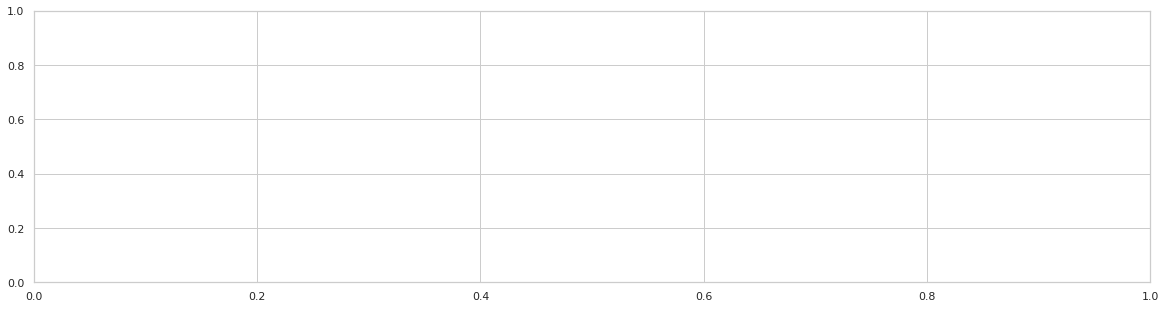

In [61]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x ='education', data = fraud)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

ValueError: ignored

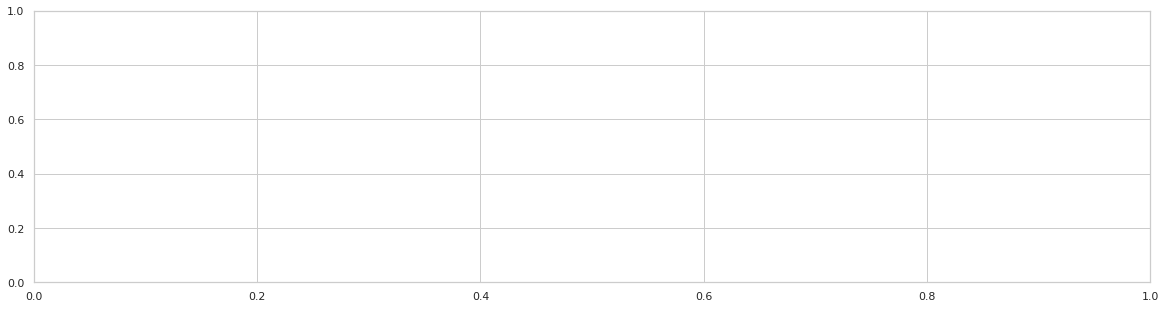

In [62]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, 
# there is no relation.
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x ='loan', data = fraud)
ax.set_xlabel('loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Normalizing the Features

In [0]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [64]:
features.head()

age  default   balance  housing  ...  day_27  day_28  day_29  day_30
0  0.519481      0.0  0.092259      1.0  ...     0.0     0.0     0.0     0.0
1  0.337662      0.0  0.073067      1.0  ...     0.0     0.0     0.0     0.0
2  0.194805      0.0  0.072822      1.0  ...     0.0     0.0     0.0     0.0
3  0.376623      0.0  0.086476      1.0  ...     0.0     0.0     0.0     0.0
4  0.194805      0.0  0.072812      0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 78 columns]

# Splitting Data into Training and Testing data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [0]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [0]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# Logistic Regression

In [68]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['s

In [69]:
clf.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}

In [70]:
clf.best_score_

0.5603864760894957

In [71]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.549
Area under ROC on test data is : 0.829
Accuracy on test data is : 0.844


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 10, max_iter = 1000)
model.fit(X_res,y_res) # training the model 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [74]:
from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6781 1204]
 [ 203  855]]


In [75]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8444100409156253


In [76]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9709335624284078


In [0]:
from sklearn.metrics import accuracy_score, classification_report 

In [78]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.84      0.86      9043



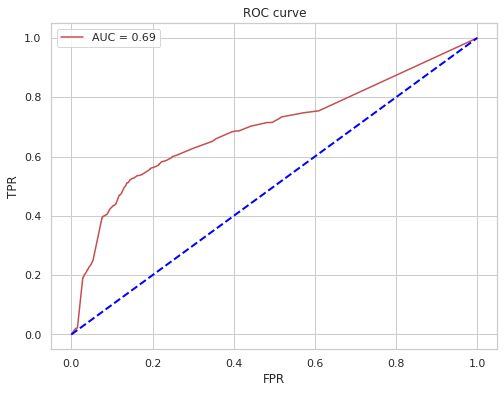

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
#add import libraries lines in importing dependencies
#Space means run in new cell



preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [163]:
print(roc_auc_score(y_test, preds))
print(auc(fpr, tpr))

0.6947419132991561
0.6947419132991561


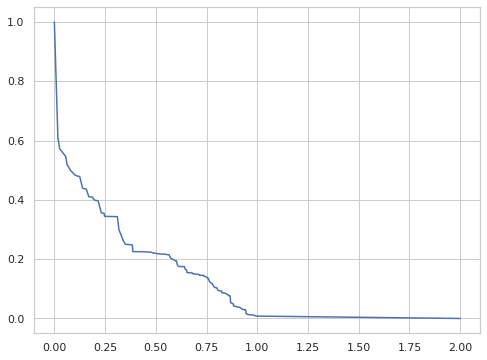

In [164]:
plt.figure(figsize=(8, 6))
plt.plot(threshold,fpr)

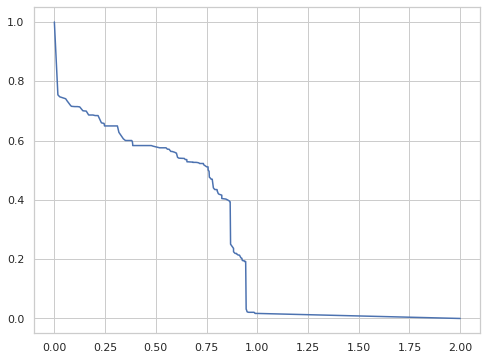

In [165]:
plt.figure(figsize=(8, 6))
plt.plot(threshold,tpr)

(0.0, 1.0)

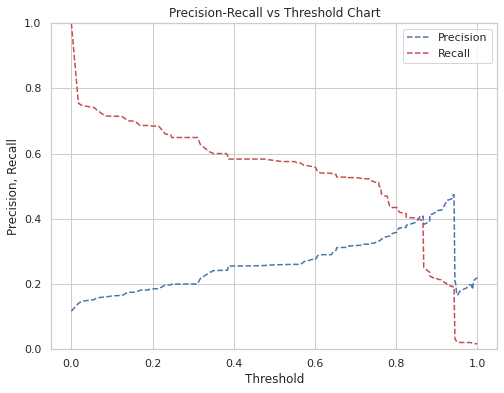

In [166]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
#pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])


# Decision Tree Classifier

In [79]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             

In [80]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [81]:
clf.best_score_

0.5311357654978565

In [82]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.540
Area under ROC on test data is : 0.816
Accuracy on test data is : 0.845


In [83]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [84]:
from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6812 1173]
 [ 233  825]]


In [85]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8445206236868296


In [86]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9669268985095812


In [87]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.41      0.78      0.54      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043



# Random Forest Classifier

In [0]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [25, 50, 75],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
        }
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                         

In [0]:
f1_score(y_test, clf.predict(X_test))

0.60671256454389

In [0]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [0]:
clf.best_score_

0.6143845067311431

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.607
Area under ROC on test data is : 0.798
Accuracy on test data is : 0.899


In [0]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6838 1147]
 [ 214  844]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8494968483910207


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.96965399886557


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7985
           1       0.42      0.80      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



# Support Vector Machine

In [88]:
params = [
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["poly"],
                "degree" : [2, 3, 4],
                "gamma" : [0.001, "auto", 0.1]
            },
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["rbf", "sigmoid"], 
                "gamma" : [0.001, "auto", 0.1]
            },
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["linear"]
            }
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 10000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [0]:
testing

In [0]:
pred = clf.predict(X_test)
pred

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

# Feature Selection

In [0]:
chivalues = chi2(features, labels)[0]
chi = pd.DataFrame(list(zip(df.drop(["y"], axis = 1).columns, chivalues)), columns = ["Features", "chi2"])

In [90]:
chi

Features        chi2
0       age    1.826498
1   default   22.313875
2   balance    1.132430
3   housing  388.949715
4      loan  143.730897
..      ...         ...
73   day_26    3.071721
74   day_27   26.728397
75   day_28   31.320724
76   day_29   47.655981
77   day_30   12.855482

[78 rows x 2 columns]

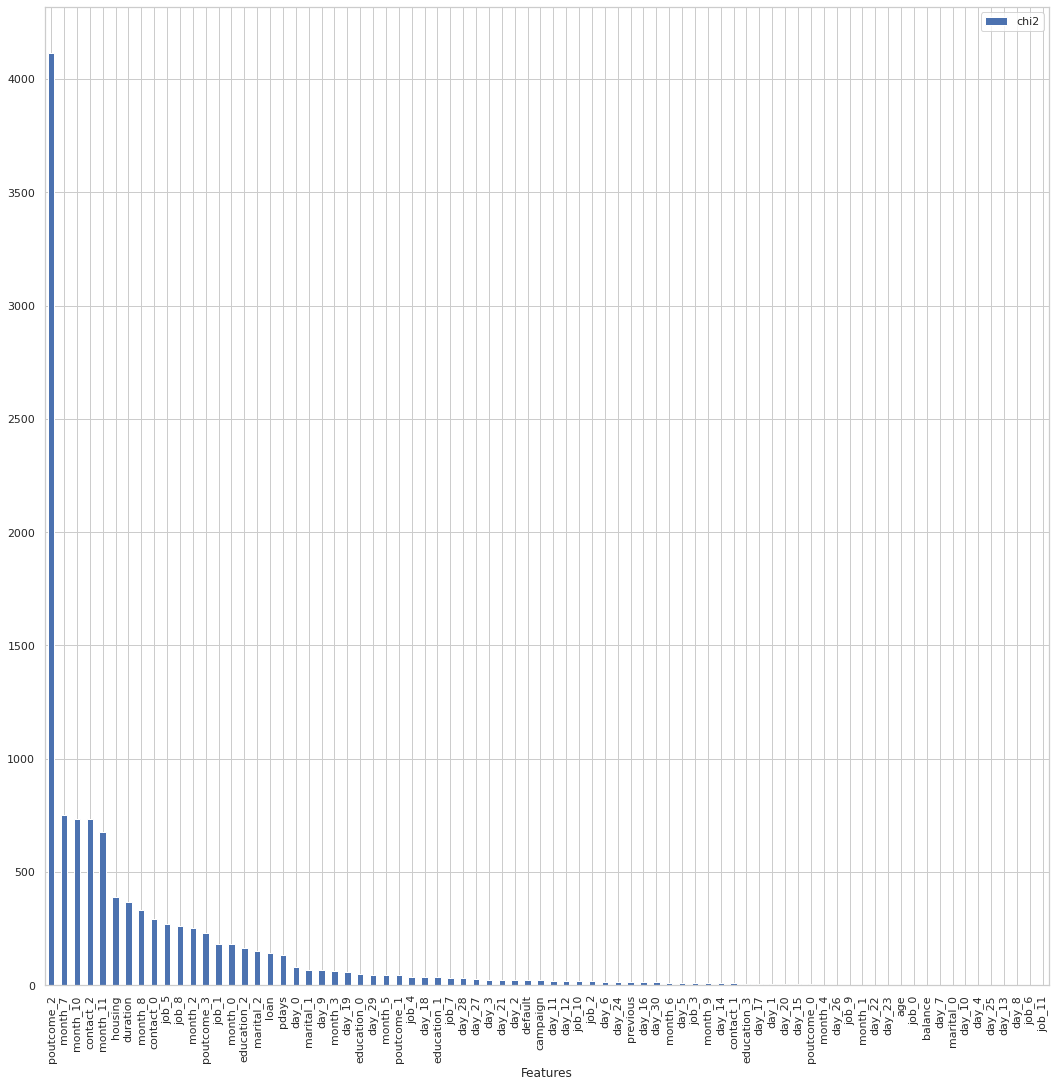

In [91]:
chi.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18))

We can clearly see that the chi2 drops to almost zero after the first 25 features.

In [0]:
k_best_features = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features, labels))

In [0]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [0]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(k_best_features, labels, test_size=0.2, random_state=1, stratify = labels)

# Logistic Regression

In [96]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['s

In [97]:
clf.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [98]:
clf.best_score_

0.5478010476127302

In [99]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.542
Area under ROC on test data is : 0.824
Accuracy on test data is : 0.841


In [100]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [101]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6760 1225]
 [ 210  848]]


In [102]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8413137233219065


In [103]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.96987087517934


In [104]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7985
           1       0.41      0.80      0.54      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043



# Decision Tree Classifier

In [105]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [10, 15, 20, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             

In [106]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [107]:
clf.best_score_

0.5139391161200799

In [108]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.460
Area under ROC on test data is : 0.805
Accuracy on test data is : 0.765


In [109]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [110]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6007 1978]
 [ 151  907]]


In [111]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.7645692801061594


In [112]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9754790516401429


In [114]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7985
           1       0.31      0.86      0.46      1058

    accuracy                           0.76      9043
   macro avg       0.64      0.80      0.65      9043
weighted avg       0.90      0.76      0.80      9043



# Random Forest Classifier

In [0]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

In [0]:
f1_score(y_test, clf.predict(X_test))

In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [0]:
pred = clf.predict(X_test)
pred

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

# Support Vector Machine

In [0]:
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.5]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.5]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [0]:
testing

In [0]:
pred = clf.predict(X_test)
pred

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

# PCA

In [115]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

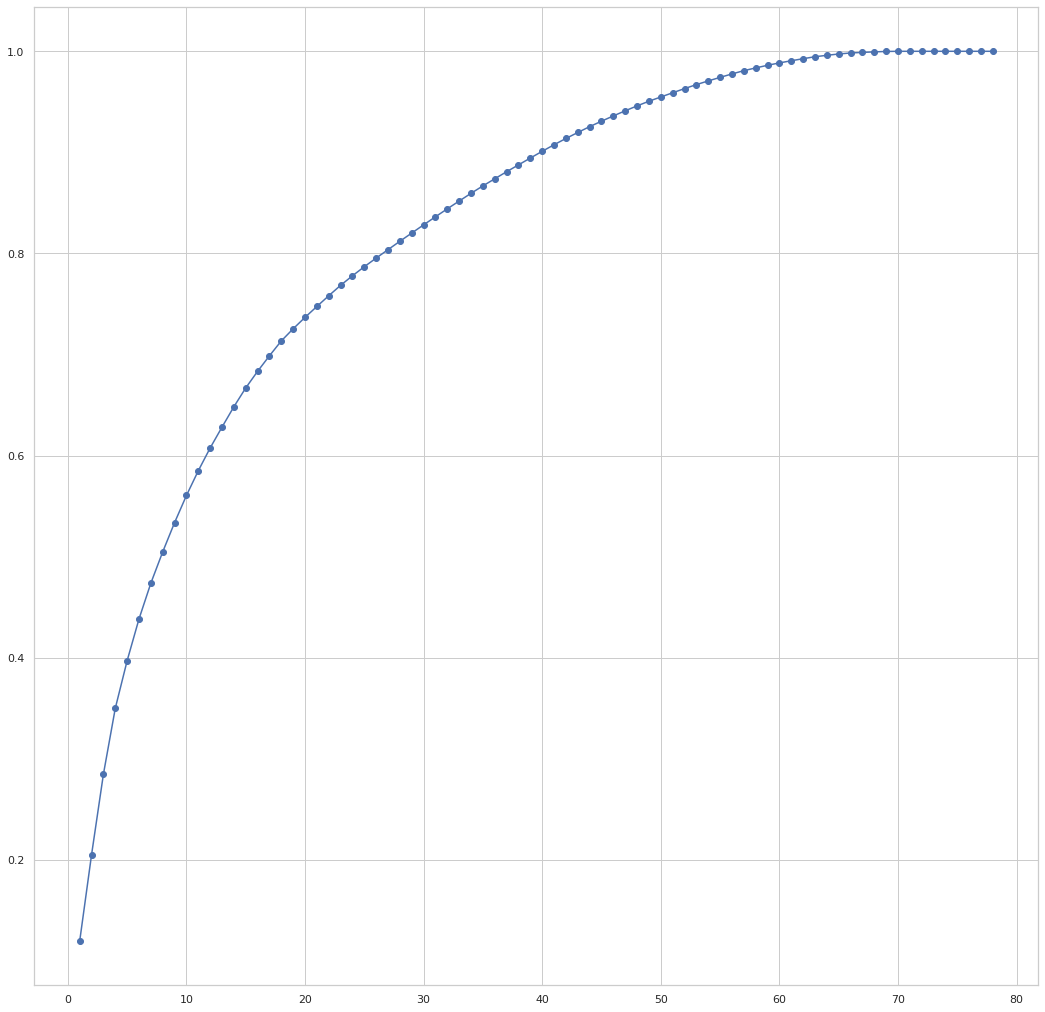

In [116]:
x = np.arange(1, len(df.columns))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

We can clearly see that first 40 components amount to a cumulative of 0.9 variance (for 50 it is roughly 0.95)

In [0]:
pca = PCA(n_components = 40)
pca_features = pca.fit_transform(features)

In [0]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=1, stratify = labels)

# Logistic Regression

In [120]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['s

In [121]:
clf.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [122]:
clf.best_score_

0.3648932670148953

In [123]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.365
Area under ROC on test data is : 0.698
Accuracy on test data is : 0.737


In [124]:
pred = clf.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [125]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[5981 2004]
 [ 374  684]]


In [126]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.7370341700763021


In [127]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9411487018095988


In [128]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      7985
           1       0.25      0.65      0.37      1058

    accuracy                           0.74      9043
   macro avg       0.60      0.70      0.60      9043
weighted avg       0.86      0.74      0.78      9043



# Decision Tree Classifier

In [129]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [15, 20, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             

In [130]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [131]:
clf.best_score_

0.3715076277795553

In [132]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.358
Area under ROC on test data is : 0.679
Accuracy on test data is : 0.758


In [133]:
pred =clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [134]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[6248 1737]
 [ 449  609]]


In [135]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.7582660621475175


In [136]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9329550545020159


In [137]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      7985
           1       0.26      0.58      0.36      1058

    accuracy                           0.76      9043
   macro avg       0.60      0.68      0.60      9043
weighted avg       0.85      0.76      0.79      9043



# Random Forest Classifier

In [0]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

In [0]:
f1_score(y_test, clf.predict(X_test))

In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [0]:
pred =clf.predict(X_test)
pred

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

# Support Vector Machine

In [0]:
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.3]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.3]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

In [0]:
testing

In [0]:
pred = clf.predict(X_test)
pred

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

In [138]:
testing

Classifier  F1-Score       AUC  Accuracy
0        Decision Tree  0.357814  0.679041  0.758266
1  Logistic Regression  0.365190  0.697766  0.737034

# Conclusion

We can see from the above results that feature selection/transformation/elimination techniques fail to improve the classification scores. And as for the original features, Decision Tree turns out to be the best classifier in terms of F1-score and Area under ROC.

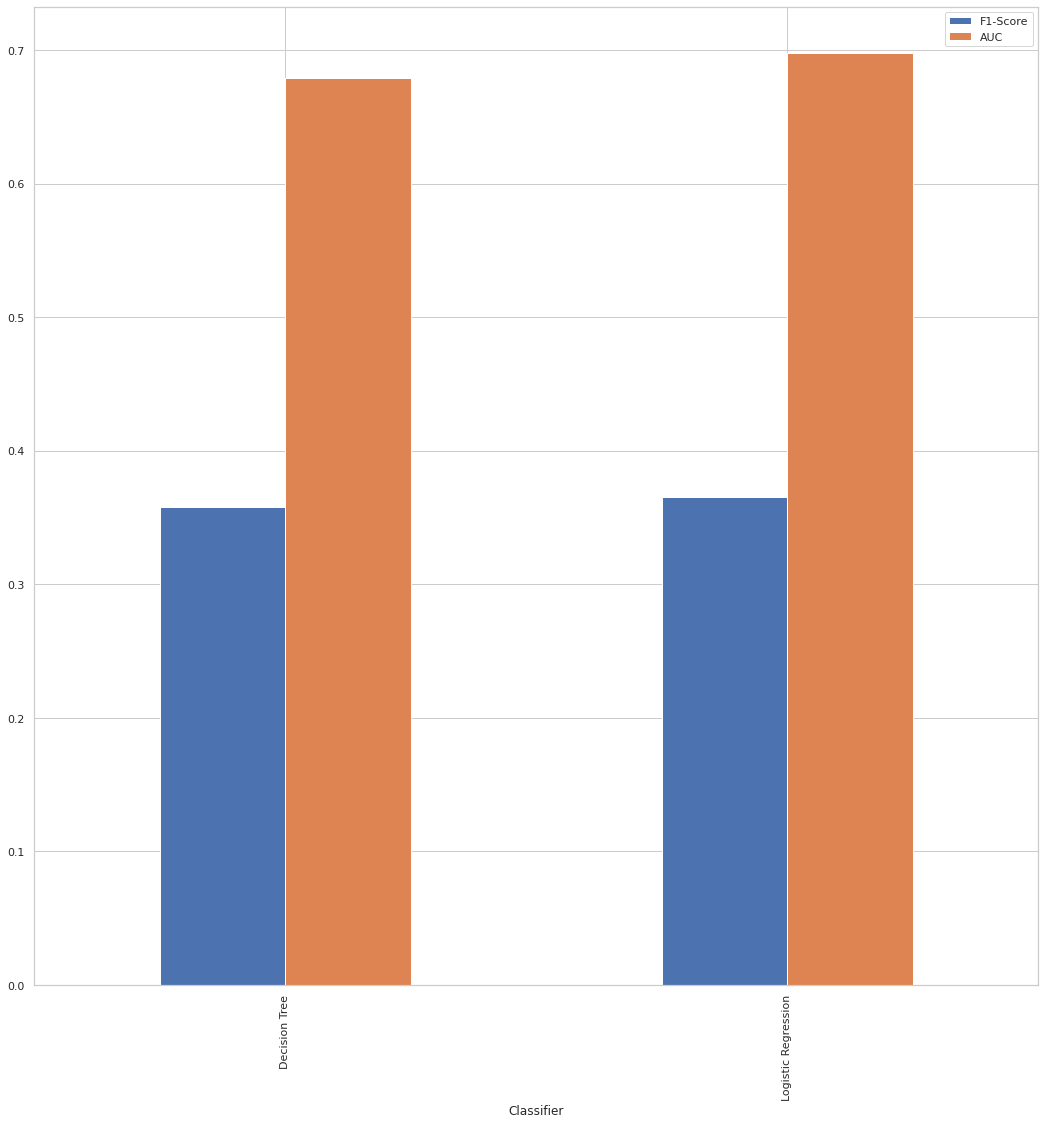

In [139]:
testing.drop(["Accuracy"], axis = 1).set_index("Classifier").plot.bar()

# Validating final model

Using the best parameters we retrain the Decision Tree
Classifier

In [0]:
# DataFrame to store results
ftesting = pd.DataFrame(columns = ["Random State", "F1-Score", "AUC", "Accuracy"])

In [0]:
def final_model(i):
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = i)
    params = {
            "criterion" : [ "entropy"], 
            "splitter" : ["random"], 
            "max_depth" : [25],
            "min_samples_split" : [3], 
            "min_samples_leaf" : [4],  
        }
    clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
    clf.fit(X_train, y_train)
    f1 = f1_score(y_test, clf.predict(X_test))
    auc = roc_auc_score(y_test, clf.predict(X_test))
    acc = accuracy_score(y_test, clf.predict(X_test))
    
    return f1, auc, acc

  

In [0]:
for i in range(10):
    f1, auc, acc = final_model(i)
    ftesting.loc[-1] = [i, f1, auc, acc]
    ftesting.index = ftesting.index + 1
    ftesting = ftesting.sort_index()

In [167]:
print(ftesting)

    Random State  F1-Score       AUC  Accuracy
0            9.0  0.320426  0.644497  0.745770
1            8.0  0.319554  0.644349  0.743337
2            7.0  0.324452  0.648021  0.747650
3            6.0  0.317110  0.640739  0.747097
4            5.0  0.318399  0.641872  0.747650
5            4.0  0.326365  0.651381  0.743448
6            3.0  0.312390  0.637705  0.741015
7            2.0  0.328889  0.651955  0.749530
8            1.0  0.327840  0.651586  0.747429
9            0.0  0.308845  0.635775  0.734712
10           2.0  0.341646  0.612458  0.883225
11           1.0  0.342787  0.613471  0.882119
12           0.0  0.349167  0.616210  0.883335


In [168]:
print(ftesting.drop(["Random State"], axis = 1).describe().T)

          count      mean       std  ...       50%       75%       max
F1-Score   13.0  0.325990  0.012133  ...  0.324452  0.328889  0.349167
AUC        13.0  0.637694  0.014424  ...  0.641872  0.648021  0.651955
Accuracy   13.0  0.776640  0.060692  ...  0.747429  0.749530  0.883335

[3 rows x 8 columns]


The standard deviation of the scores is really low, which means that the changing the random states for the cross validation doesn't affect the scores much.